In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Carga de datos
df = pd.read_csv('../data/raw/water_potability.csv')
print("Dimensiones iniciales del dataset:", df.shape)

Dimensiones iniciales del dataset: (3276, 10)


In [7]:
# Imputación de valores faltantes (nulos)
# Imputación usando la media
def impute_missing_by_class(df, column, target='Potability'):
    """
    Imputa los valores faltantes en una columna específica utilizando la media
    basada en las clases de la variable objetivo.
    """
    # Calcular la media específica para agua potable y no potable
    means = df.groupby(target)[column].transform('mean')
    
    # Rellenar los valores nulos con la media correspondiente
    df[column] = df[column].fillna(means)
    print(f"Variable '{column}' imputada. Nulos restantes: {df[column].isnull().sum()}")
    return df

print("Iniciando imputación de valores faltantes...")
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    df = impute_missing_by_class(df, col)

Iniciando imputación de valores faltantes...
Variable 'ph' imputada. Nulos restantes: 0
Variable 'Sulfate' imputada. Nulos restantes: 0
Variable 'Trihalomethanes' imputada. Nulos restantes: 0


In [8]:
# Balanceo de clases con SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique) funciona generando datos sintéticos
# para la clase minoritaria. En lugar de duplicar ejemplos existentes, crea nuevos
# puntos interpolando entre vecinos cercanos de la misma clase, lo que ayuda a
# evitar el sobreajuste y mejora la generalización del modelo.

print("Iniciando balanceo de clases con SMOTE...")
X = df.drop('Potability', axis=1) # Características
y = df['Potability']              # Variable objetivo

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Clases antes del balanceo: {Counter(y)}")
print(f"Clases después del balanceo: {Counter(y_resampled)}")

# Guardar el dataset limpio y balanceado
df_cleaned = pd.concat(
    [
        pd.DataFrame(X_resampled, columns=X.columns),
        pd.Series(y_resampled, name='Potability')
    ], axis=1
)

df_cleaned.to_csv('../data/processed/water_potability_cleaned.csv', index=False)
print("\nDataset limpio y balanceado guardado exitosamente.")

Iniciando balanceo de clases con SMOTE...
Clases antes del balanceo: Counter({0: 1998, 1: 1278})
Clases después del balanceo: Counter({0: 1998, 1: 1998})

Dataset limpio y balanceado guardado exitosamente.


Distribucion del dataset limpio y balanceado:


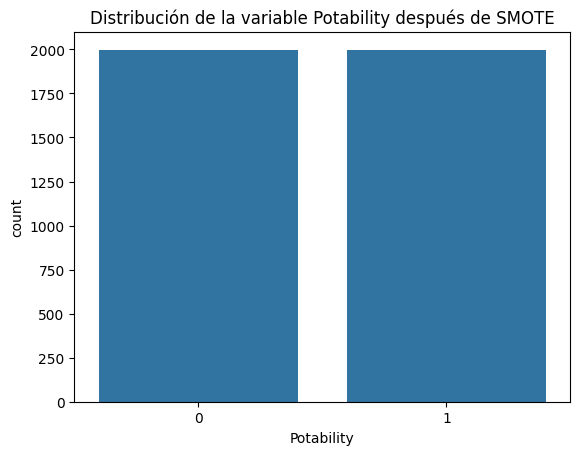

In [9]:
print("Distribucion del dataset limpio y balanceado:")
sns.countplot(x='Potability', data=df_cleaned)
plt.title('Distribución de la variable Potability después de SMOTE')
plt.show()